# Телеком

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

<br>Оператор предоставляет два основных типа услуг: 
1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).
<br>Также доступны такие услуги: 
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

<br>За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

<br>Данные состоят из файлов, полученных из разных источников:

`contract_new.csv` — информация о договоре;

`personal_new.csv` — персональные данные клиента;

`internet_new.csv` — информация об интернет-услугах;

`phone_new.csv` — информация об услугах телефонии.


Во всех файлах столбец `customerID` содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.


- `BeginDate ` – дата начала пользования услугами
- `EndDate` – дата окончания пользования услугами
- `Type` – тип оплаты: ежемесячный, годовой и тд
- `PaperlessBilling` – электронный платёжный документ
- `PaymentMethod` – способ оплаты
- `MonthlyCharges` – ежемесячные траты на услуги по договору
- `TotalCharges` – всего потрачено денег на услуги
- `Dependents` – наличие иждивенцев
- `Senior Citizen` – наличие пенсионного статуса по возрасту
- `Partner` – наличие супруга(и)
- `MultipleLines` – наличие возможности ведения параллельных линий во время звонка

**Цель проекта**

<br> Построить модель для предсказания оттока клиентов, что бы заказчик имел возможность удержать клиента с помощью промокодов и других предложений.

**План проекта**

1. Загрузка данных
- Загрузка и ознакомление с данными 
2. Подготовка данных
- Преобразование данных
- Объединение данных
- Выделение целевого признака
3. Исследовательский анализ данных (EDA)
- Подготовка модели к обучению
4. Обучение  моделей
- Подбор гиперпараметров
- Выбор лучшей модели
5. Тестирование модели
- Тестирование лучшей модели на тестовой выборке
6. Анализ и интерпретация важности признаков
7. Анализ и интерпретация матрицы ошибок
6. Вывод

**Вопросов на данном этапе нет**

### Загрузка данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import phik
import shap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
df_contract = pd.read_csv('/datasets/contract_new.csv')
df_personal = pd.read_csv('/datasets/personal_new.csv')
df_internet = pd.read_csv('/datasets/internet_new.csv')
df_phone = pd.read_csv('/datasets/phone_new.csv')

In [5]:
 df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [6]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [8]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [9]:
def analyze_dataframe(df, name):
    print(f"Описание таблицы {name}:")
    df.info()
    print(df.describe())
    print("Количество пропусков в таблице:")
    print(df.isnull().sum())
    print("Количество дубликатов в таблице:")
    print(df.duplicated().sum())
    print()

analyze_dataframe(df_contract, "df_contract")
analyze_dataframe(df_personal, "df_personal")
analyze_dataframe(df_internet, "df_internet")
analyze_dataframe(df_phone, "df_phone")


Описание таблицы df_contract:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000
Количество пропусков в таблице:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0


**Вывод**

- На данном этапе можно сделать вывод, что пропусков нет и явных дубликатов тоже нет. Все таблицы связаны между собой по столбцу `customerID`, содержащий код клиента.
- Названия столбцов нужно привести к нижнему регистру

### Подготовка данных

- Преобразование данных
- Объединение данных
- Выделение целевого признака

In [10]:
current_date = '2020-02-01'

Посмотрим на названия столбцов

In [11]:
print("df_contract columns:", df_contract.columns)
print()
print("df_personal columns:", df_personal.columns)
print()
print("df_internet columns:", df_internet.columns)
print()
print("df_phone columns:", df_phone.columns)

df_contract columns: Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

df_personal columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

df_internet columns: Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

df_phone columns: Index(['customerID', 'MultipleLines'], dtype='object')


Преобразование названий столбцов для всех таблиц к "змеиному" типу

In [12]:
def snake_case(column_name):
    column_name = re.sub(r'([a-z])([A-Z])', r'\1_\2', column_name).lower()
    return column_name

In [13]:
df_contract = df_contract.rename(columns=snake_case)
df_personal = df_personal.rename(columns=snake_case)
df_internet = df_internet.rename(columns=snake_case)
df_phone = df_phone.rename(columns=snake_case)
# Вывод названий столбцов для каждой таблицы
print("df_contract columns:", df_contract.columns)
print()
print("df_personal columns:", df_personal.columns)
print()
print("df_internet columns:", df_internet.columns)
print()
print("df_phone columns:", df_phone.columns)

df_contract columns: Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

df_personal columns: Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

df_internet columns: Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

df_phone columns: Index(['customer_id', 'multiple_lines'], dtype='object')


In [14]:
df_contract.info()
print()
df_personal.info()
print()
df_internet.info()
print()
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-nul

Объединим таблицы 

Будем использовать метод left, чтобы сохранить все записи.

In [15]:
# Объединение таблиц по столбцу "customer_id"
df = df_contract.merge(df_personal, on='customer_id', how='left') \
                      .merge(df_internet, on='customer_id', how='left') \
                      .merge(df_phone, on='customer_id', how='left')

df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [16]:
analyze_dataframe(df, "df")

Описание таблицы df:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  tec

Выделим целевой признак

In [18]:
df['status'] = df['end_date'].apply(lambda x: 1 if x != 'No' else 0)

In [19]:
df.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,status
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,NaN,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,...,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,0
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,...,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,0
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,...,No,DSL,Yes,No,No,No,No,No,NaN,0
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,...,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,0
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,...,Yes,DSL,Yes,Yes,No,No,No,No,No,1


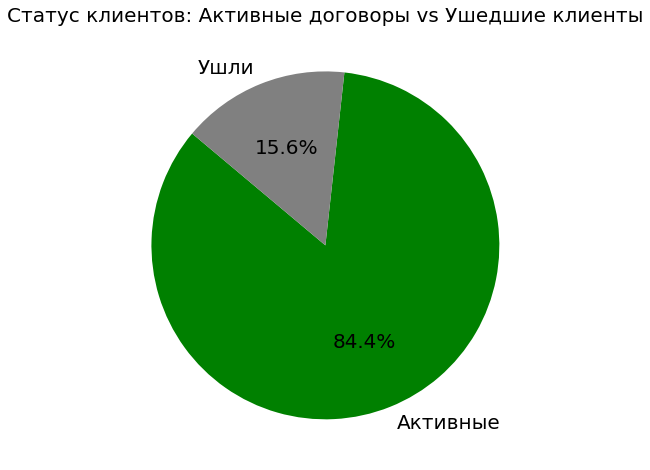

In [20]:
# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
colors = ['green', 'gray']  # Зеленый для активных, голубой для ушедших
plt.pie(df['status'].value_counts(), labels=['Активные', 'Ушли'], colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20})
plt.title('Статус клиентов: Активные договоры vs Ушедшие клиенты', size=20)
plt.show()


**Вывод**
- Привели названия столбцов к "змеиному" типу
- Создали целевой признак столбец `status`, который указывает на то, ушел клиент или остался. Проанализируйте его распределение, чтобы понять, какой процент клиентов ушел и какой остался.
- Была проведена визуализация дисбаланса классов, подтверждающая присутствие дисбаланса между активными и ушедшими клиентами.
Принимая во внимание дисбаланс классов целевого признака, важно выбрать подходящую метрику для оценки качества модели. Будем использовать метрику AUC-ROC, которая позволяет оценить производительность модели, учитывая дисбаланс классов. Для дополнительной коррекции влияния дисбаланса классов будем применять параметр class_weight='balanced'.

### Исследовательский анализ данных (EDA)

 Рассмотрим пропуски

`internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`: все эти столбцы относятся к дополнительным услугам интернета. Пропущенные значения могли возникнуть, если клиент не подключал эти дополнительные услуги

`multiple_lines`: этот столбец относится к услугам подключения телефонного аппарата к нескольким линиям одновременно. Пропущенные значения могли возникнуть, если клиент не подключал эту услугу

In [21]:
# Найдем столбцы с пропущенными значениями
cols_with_missing = df.columns[df.isnull().any()]

# Выведем уникальные значения
for col in cols_with_missing:
    unique_values = df[col].unique()
    print(f"Уникальные значения для столбца {col}: {unique_values}")


Уникальные значения для столбца internet_service: ['DSL' 'Fiber optic' nan]
Уникальные значения для столбца online_security: ['No' 'Yes' nan]
Уникальные значения для столбца online_backup: ['Yes' 'No' nan]
Уникальные значения для столбца device_protection: ['No' 'Yes' nan]
Уникальные значения для столбца tech_support: ['No' 'Yes' nan]
Уникальные значения для столбца streaming_tv: ['No' 'Yes' nan]
Уникальные значения для столбца streaming_movies: ['No' 'Yes' nan]
Уникальные значения для столбца multiple_lines: [nan 'No' 'Yes']


In [23]:
# Заполним пропущенные значения строкой 'Not_used'
for col in cols_with_missing:
    df[col].fillna('Not_used', inplace=True)

In [24]:
# Выведем уникальные значения
for col in cols_with_missing:
    unique_values = df[col].unique()
    print(f"Уникальные значения для столбца {col}: {unique_values}")

Уникальные значения для столбца internet_service: ['DSL' 'Fiber optic' 'Not_used']
Уникальные значения для столбца online_security: ['No' 'Yes' 'Not_used']
Уникальные значения для столбца online_backup: ['Yes' 'No' 'Not_used']
Уникальные значения для столбца device_protection: ['No' 'Yes' 'Not_used']
Уникальные значения для столбца tech_support: ['No' 'Yes' 'Not_used']
Уникальные значения для столбца streaming_tv: ['No' 'Yes' 'Not_used']
Уникальные значения для столбца streaming_movies: ['No' 'Yes' 'Not_used']
Уникальные значения для столбца multiple_lines: ['Not_used' 'No' 'Yes']


In [25]:
df.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
status               0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

`begin_date` и `end_date` - столбцы, представляющие даты начала и окончания пользования услугами. Их следует преобразовать в тип данных datetime.

In [27]:
df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')

In [28]:
df['begin_date'].unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

In [29]:
df['begin_date'] = pd.to_datetime(df['begin_date'])

In [30]:
df['end_date'].unique()

array(['No', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

In [31]:
df['end_date'] = df['end_date'].replace('No', current_date)
df['end_date'] = pd.to_datetime(df['end_date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

**Вывод**
- Избавились от пропусков, заменив их `Not_used`
- Столбцы `begin_date` и `end_date` преобразовали в тип данных `atetime`
- Столбец `total_charges` преобразовали в тип данных `float`

#### Создание новых  признаков 

In [33]:
# Рассчитываем длительность контракта в месяцах
df['contract_months'] = ((df['end_date'] - df['begin_date']) / np.timedelta64(1, 'M')).astype(int)

In [34]:
# Рассчитываем длительность контракта в днях
df['contract_days'] = ((df['end_date'] - df['begin_date']) / np.timedelta64(1, 'D')).astype(int)

In [35]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,status,contract_months,contract_days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,Yes,No,No,No,No,Not_used,0,1,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,Yes,No,Yes,No,No,No,No,0,34,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,Yes,Yes,No,No,No,No,No,0,4,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,Yes,No,Yes,Yes,No,No,Not_used,0,45,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,No,No,No,No,No,No,0,5,153


####  Исследуем признаки 

Удаляем ненужные нам для анализа признаки

In [36]:
df = df.drop(['customer_id', 'begin_date', 'end_date'], axis=1)

Изменим тип даных у признака `senior_citizen`, так как в будущем туда могут начать записывать , например, Yes и No

In [37]:
df['senior_citizen'] = df['senior_citizen'].astype('object')

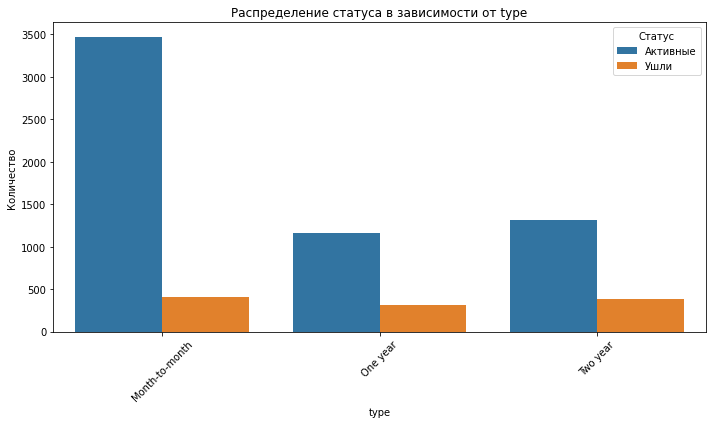

Количество клиентов по статусу в зависимости от type:
status          Активные  Ушли
type                          
Month-to-month      3468   407
One year            1160   313
Two year            1314   381

Процент ушедших клиентов по type:
status          Процент_Ушли
type                        
Month-to-month     10.503226
One year           21.249151
Two year           22.477876



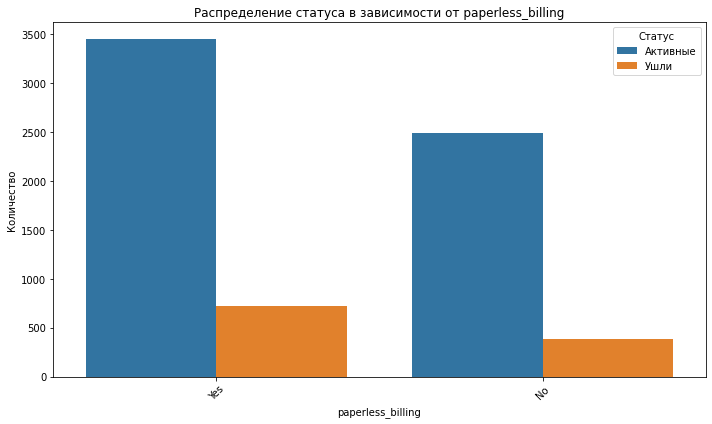

Количество клиентов по статусу в зависимости от paperless_billing:
status             Активные  Ушли
paperless_billing                
No                     2492   380
Yes                    3450   721

Процент ушедших клиентов по paperless_billing:
status             Процент_Ушли
paperless_billing              
No                    13.231198
Yes                   17.286023



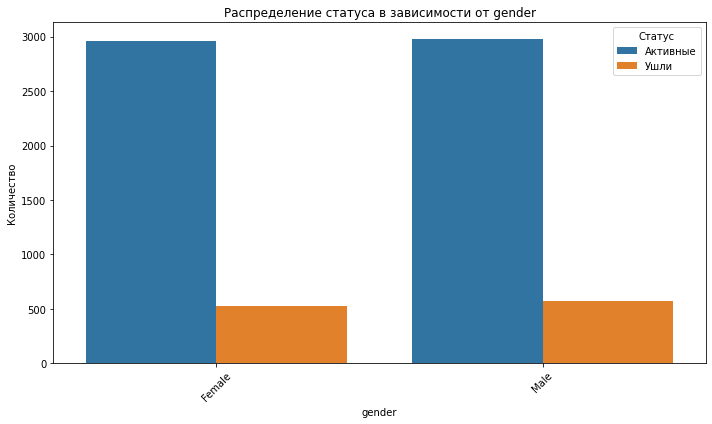

Количество клиентов по статусу в зависимости от gender:
status  Активные  Ушли
gender                
Female      2960   528
Male        2982   573

Процент ушедших клиентов по gender:
status  Процент_Ушли
gender              
Female     15.137615
Male       16.118143



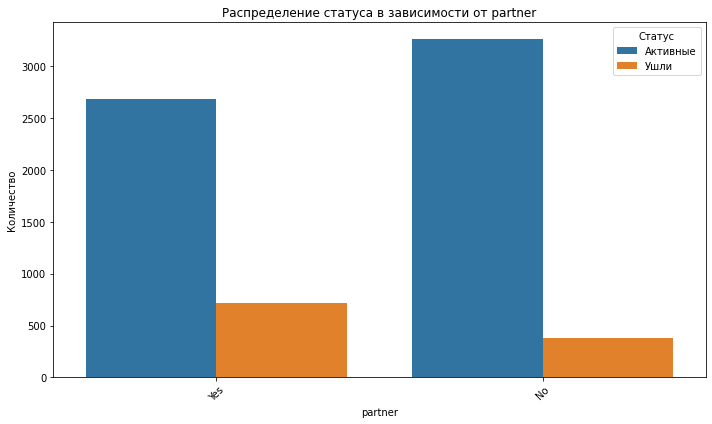

Количество клиентов по статусу в зависимости от partner:
status   Активные  Ушли
partner                
No           3259   382
Yes          2683   719

Процент ушедших клиентов по partner:
status   Процент_Ушли
partner              
No          10.491623
Yes         21.134627



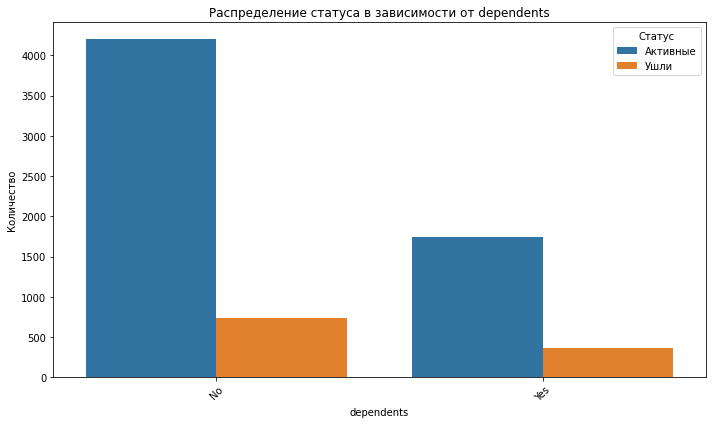

Количество клиентов по статусу в зависимости от dependents:
status      Активные  Ушли
dependents                
No              4200   733
Yes             1742   368

Процент ушедших клиентов по dependents:
status      Процент_Ушли
dependents              
No             14.859112
Yes            17.440758



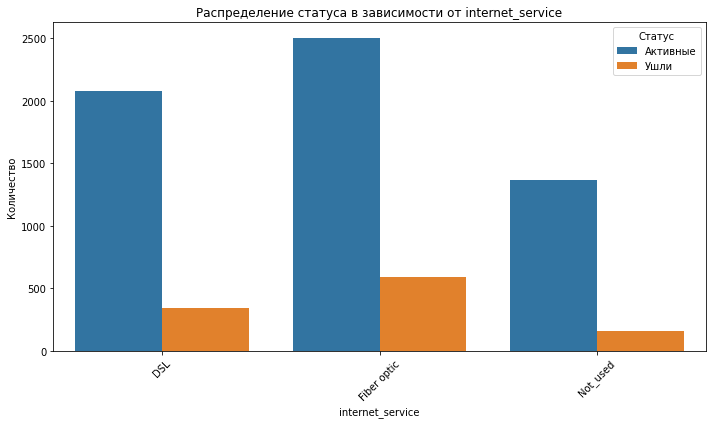

Количество клиентов по статусу в зависимости от internet_service:
status            Активные  Ушли
internet_service                
DSL                   2075   346
Fiber optic           2501   595
Not_used              1366   160

Процент ушедших клиентов по internet_service:
status            Процент_Ушли
internet_service              
DSL                  14.291615
Fiber optic          19.218346
Not_used             10.484928



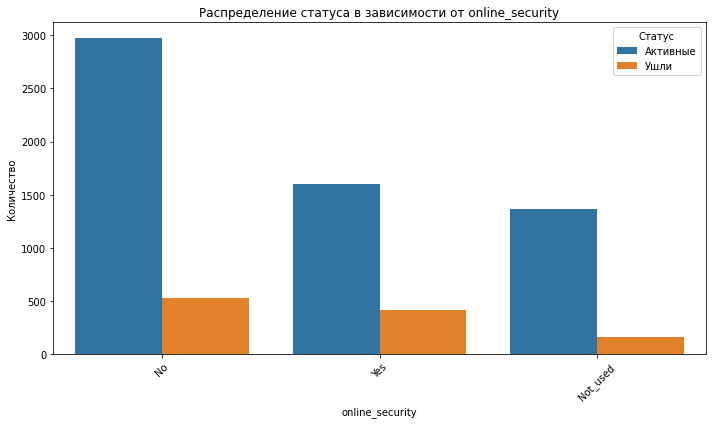

Количество клиентов по статусу в зависимости от online_security:
status           Активные  Ушли
online_security                
No                   2972   526
Not_used             1366   160
Yes                  1604   415

Процент ушедших клиентов по online_security:
status           Процент_Ушли
online_security              
No                  15.037164
Not_used            10.484928
Yes                 20.554730



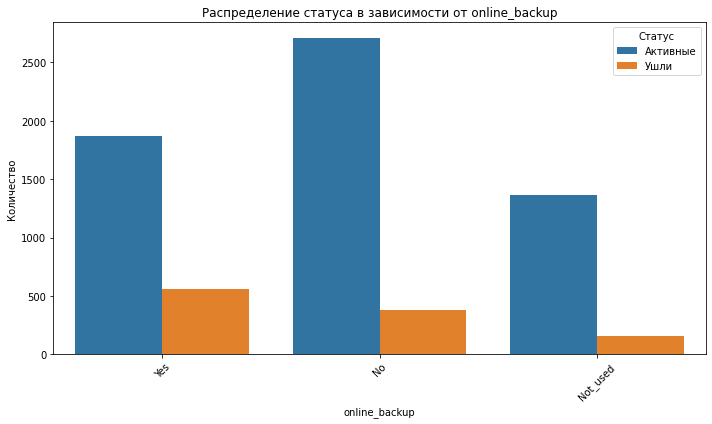

Количество клиентов по статусу в зависимости от online_backup:
status         Активные  Ушли
online_backup                
No                 2707   381
Not_used           1366   160
Yes                1869   560

Процент ушедших клиентов по online_backup:
status         Процент_Ушли
online_backup              
No                12.338083
Not_used          10.484928
Yes               23.054755



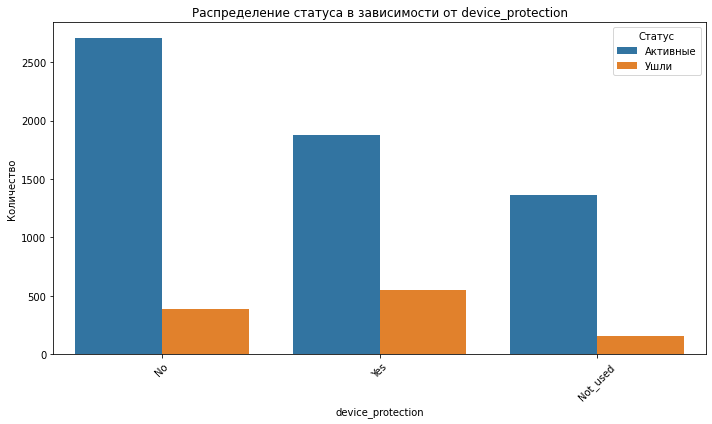

Количество клиентов по статусу в зависимости от device_protection:
status             Активные  Ушли
device_protection                
No                     2704   391
Not_used               1366   160
Yes                    1872   550

Процент ушедших клиентов по device_protection:
status             Процент_Ушли
device_protection              
No                    12.633279
Not_used              10.484928
Yes                   22.708505



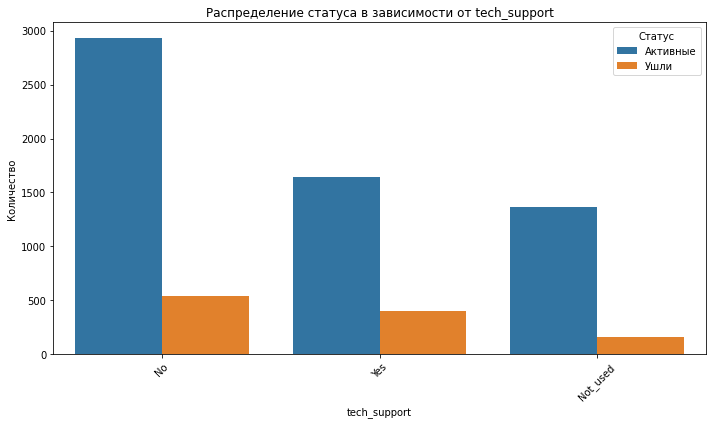

Количество клиентов по статусу в зависимости от tech_support:
status        Активные  Ушли
tech_support                
No                2930   543
Not_used          1366   160
Yes               1646   398

Процент ушедших клиентов по tech_support:
status        Процент_Ушли
tech_support              
No               15.634898
Not_used         10.484928
Yes              19.471624



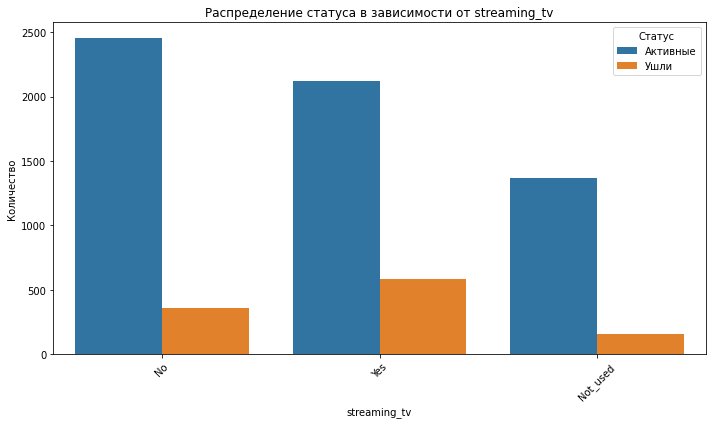

Количество клиентов по статусу в зависимости от streaming_tv:
status        Активные  Ушли
streaming_tv                
No                2453   357
Not_used          1366   160
Yes               2123   584

Процент ушедших клиентов по streaming_tv:
status        Процент_Ушли
streaming_tv              
No               12.704626
Not_used         10.484928
Yes              21.573698



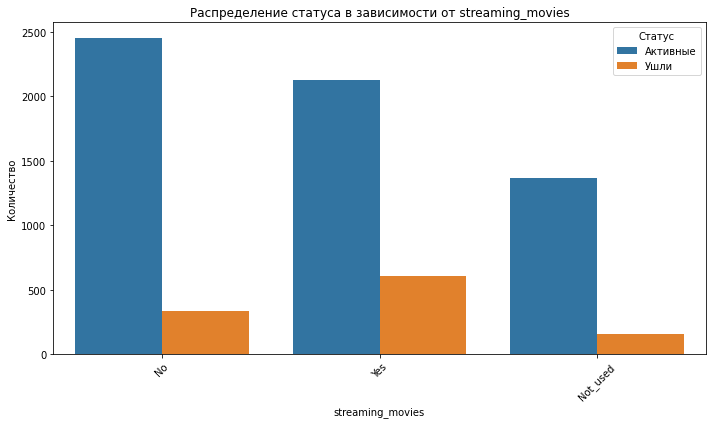

Количество клиентов по статусу в зависимости от streaming_movies:
status            Активные  Ушли
streaming_movies                
No                    2450   335
Not_used              1366   160
Yes                   2126   606

Процент ушедших клиентов по streaming_movies:
status            Процент_Ушли
streaming_movies              
No                   12.028725
Not_used             10.484928
Yes                  22.181552



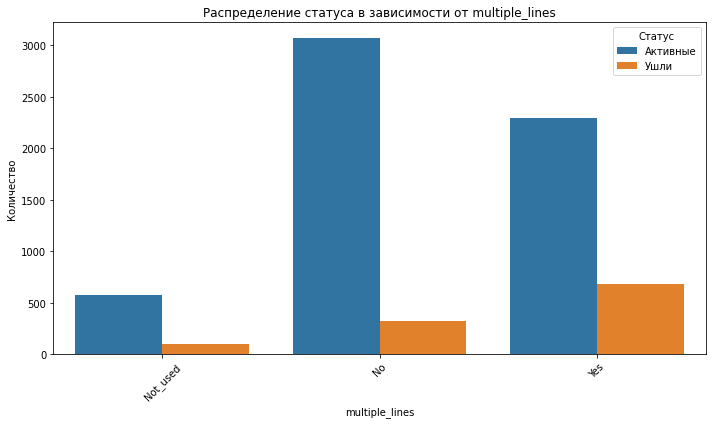

Количество клиентов по статусу в зависимости от multiple_lines:
status          Активные  Ушли
multiple_lines                
No                  3070   320
Not_used             579   103
Yes                 2293   678

Процент ушедших клиентов по multiple_lines:
status          Процент_Ушли
multiple_lines              
No                  9.439528
Not_used           15.102639
Yes                22.820599



In [39]:
# Выбираем столбцы
categorical_cols = ['type', 'paperless_billing', 'gender', 'partner', 'dependents', 'internet_service', 
                    'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                    'streaming_movies', 'multiple_lines']

# Строим графики 
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='status', data=df)
    plt.title(f'Распределение статуса в зависимости от {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.legend(title='Статус', labels=['Активные', 'Ушли'])
    plt.tight_layout()
    plt.show()

    # Выводим числовую информацию с заменой цифр на слова
    counts = df.groupby([col, 'status']).size().unstack(fill_value=0)
    counts = counts.rename(columns={0: 'Активные', 1: 'Ушли'})
    print(f'Количество клиентов по статусу в зависимости от {col}:\n{counts.to_string()}\n')

    # Вычисляем процент ушедших клиентов от общего числа клиентов (Активные + Ушли) 
    type_churn = df.groupby([col, 'status']).size().unstack(fill_value=0)
    type_churn['Процент_Ушли'] = (type_churn[1] / (type_churn[0] + type_churn[1])) * 100
    print(f'Процент ушедших клиентов по {col}:\n{type_churn[["Процент_Ушли"]].to_string()}\n')


1. `type`
- Тип оплаты не сильно влияет на отток клиентов, то есть отток стабильно примерно одинаковый.
2. `paperless_billing`
- Клиенты, использующие бумажные платежи, кажется, более склонны к оттоку, но незначительно 
3. `gender`
- Пол не влияет на отток клиентов
4. `partner`
- На графике видно, что люди,имеющие супруг/супруга уходят чаще 
5. `dependents`
- Наличие иждевенцев влияет незначительно на отток клиентов
6. `internet_service`
- Процент ушедших клиентов среди пользователей `Fiber optic` выше всех 
7. `online_security`
- Онлайн безопасность практически не влияет на отток клиентов
8. `online_backup`
- Практически не влиет на отток клиентов
9. `device_protection`
- Практически не влиет на отток клиентов
10. `tech_support`
- Практически не влиет на отток клиентов
11. `streaming_tv`
- Практически не влиет на отток клиентов
12. `streaming_movies`
- Практически не влиет на отток клиентов
13. `multiple_lines`
- Практически не влиет на отток клиентов

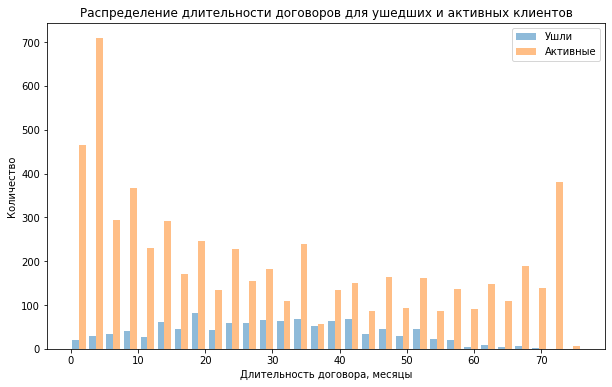

In [40]:
# Разделение клиентов на ушедших и активных
churned_clients = df[df['status'] == 1]
active_clients = df[df['status'] == 0]

# Построение гистограммы 
plt.figure(figsize=(10, 6))
plt.hist([churned_clients['contract_months'], active_clients['contract_months']], bins=30, alpha=0.5, label=['Ушли', 'Активные'])
plt.xlabel('Длительность договора, месяцы')
plt.ylabel('Количество')
plt.title('Распределение длительности договоров для ушедших и активных клиентов')
plt.legend()
plt.show()


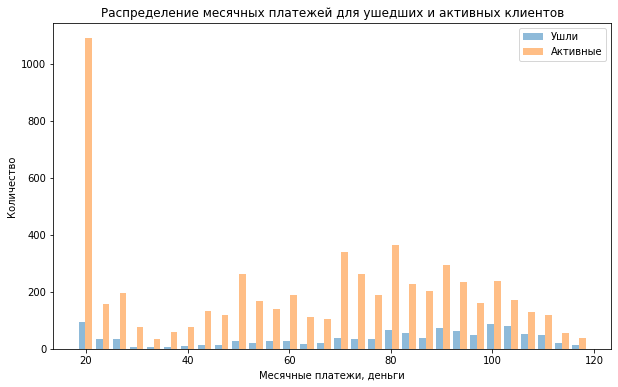

In [41]:
# Построение гистограммы 
plt.figure(figsize=(10, 6))
plt.hist([churned_clients['monthly_charges'], active_clients['monthly_charges']], bins=30, alpha=0.5, label=['Ушли', 'Активные'])
plt.xlabel('Месячные платежи, деньги')
plt.ylabel('Количество')
plt.title('Распределение месячных платежей для ушедших и активных клиентов')
plt.legend()
plt.show()

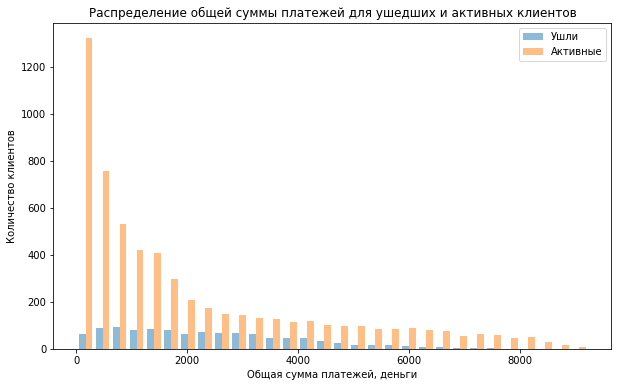

In [42]:
# Построение гистограммы 
plt.figure(figsize=(10, 6))
plt.hist([churned_clients['total_charges'], active_clients['total_charges']], bins=30, alpha=0.5, label=['Ушли', 'Активные'])
plt.xlabel('Общая сумма платежей, деньги')
plt.ylabel('Количество клиентов')
plt.title('Распределение общей суммы платежей для ушедших и активных клиентов')
plt.legend()
plt.show()

Можно сделать выводы:
-  Длительность договора имеет влияние на удержание клиентов. Клиенты, заключившие контракты на более длительные сроки, более склонны оставаться активными, в то время как короткие контракты могут сопровождаться более высоким процентом ухода.
- Клиенты с месячными платежами в нижних и средних диапазонах более склонны оставаться активными, в то время как клиенты с более высокими месячными платежами имеют более высокую вероятность ухода. 
- Клиенты с более высокой общей суммой платежей более склонны оставаться активными клиентами, в то время как клиенты с низкой общей суммой платежей имеют более высокую вероятность ухода.

Строим тепловую карту

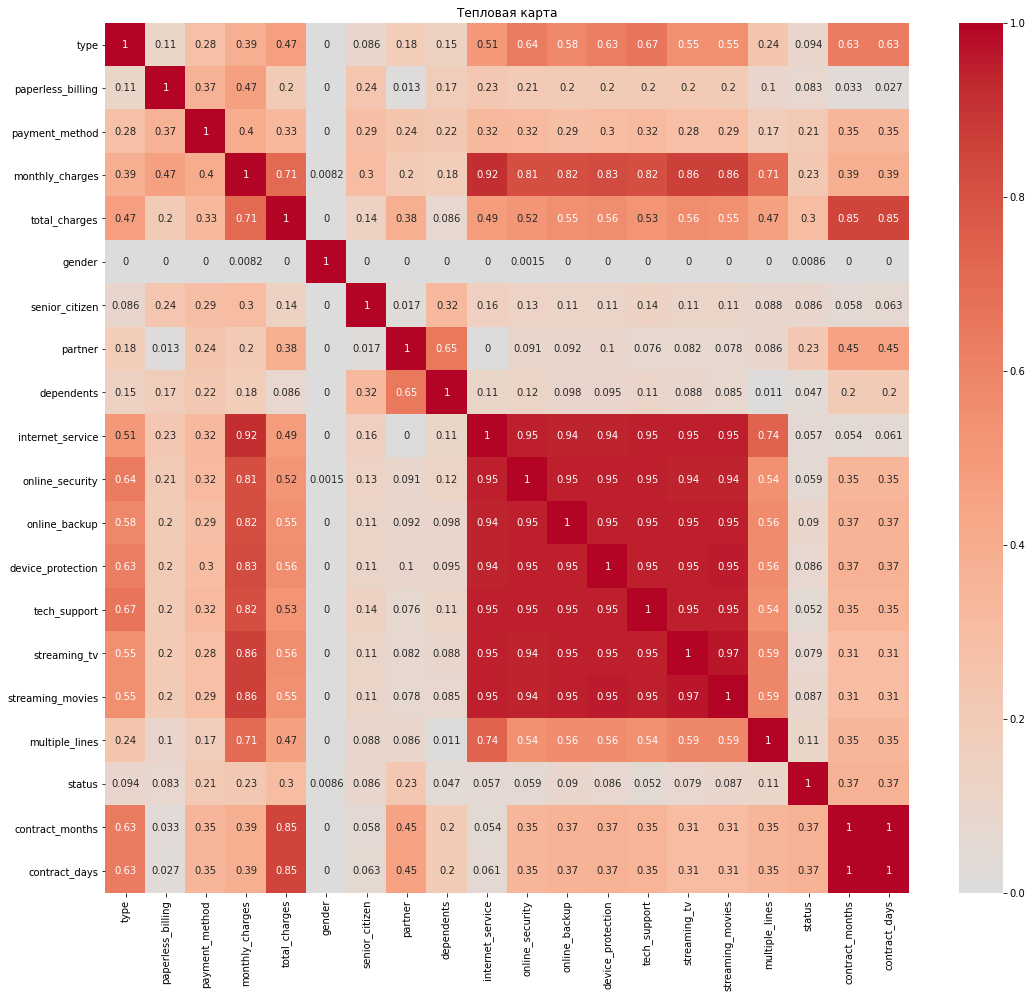

In [44]:
# Определяем список непрерывных переменных
interval_cols = ['monthly_charges', 'total_charges', 'contract_months', 'contract_days']

# Рассчитываем матрицу корреляции
correlation_matrix = phik.phik_matrix(df, interval_cols=interval_cols)

# Строим тепловую карту корреляции
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True)
plt.title("Тепловая карта")
plt.show()

In [45]:
correlation_matrix['status'].sort_values(ascending=False)

status               1.000000
contract_days        0.374569
contract_months      0.368902
total_charges        0.303758
partner              0.226688
monthly_charges      0.226280
payment_method       0.214832
multiple_lines       0.105101
type                 0.094015
online_backup        0.089704
streaming_movies     0.086577
senior_citizen       0.086159
device_protection    0.085608
paperless_billing    0.083398
streaming_tv         0.078545
online_security      0.058659
internet_service     0.056621
tech_support         0.051537
dependents           0.046871
gender               0.008581
Name: status, dtype: float64

- Признак `gender` имеет незначительное влияние на остальные признаки и целевую переменную . В связи с этим, признак `gender` можно считать малозначимым для предсказания целевой переменной и общего анализа.
- Есть также высокая корреляция между различными видами услуг, такими как `internet_service`, `online_security`, `online_backup`, `device_protection` и `tech_support`, `streaming_tv`,`streaming_movies`. Это может указывать на то, что клиенты, выбравшие одну услугу, часто выбирают и другие. Они еще сильно коррелируют с признаком `monthly_charges` и поэтому мы их удалим.
- `total_charges` сильно коррелирует с `contract_months` и поэтому мы удалим столбец `total_charges` 

In [46]:
df = df.drop(['gender','internet_service', 'online_security','online_backup','device_protection','tech_support', 'streaming_tv', 'streaming_movies', 'total_charges','contract_months'], axis = 1)

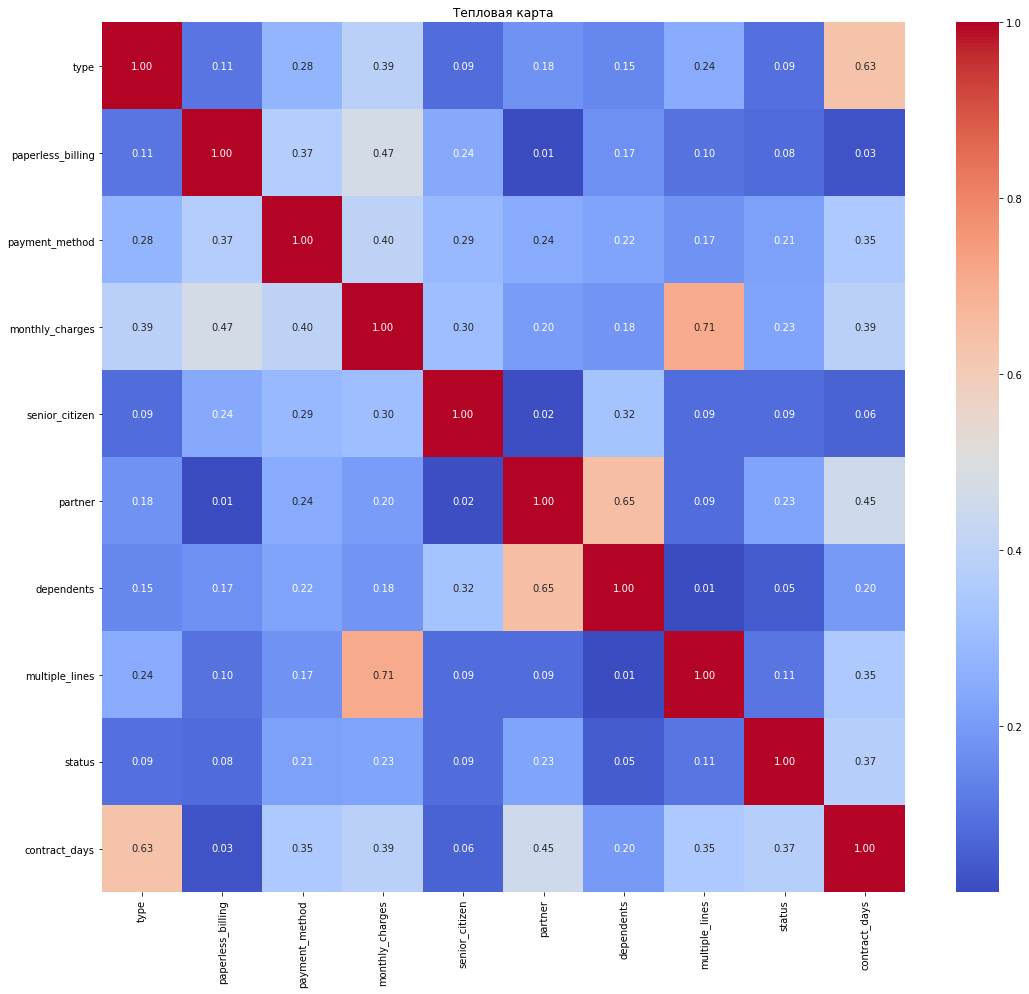

In [47]:
# Рассчитываем матрицу корреляции
correlation_matrix = phik.phik_matrix(df, interval_cols=interval_cols)

# Строим тепловую карту корреляции
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Тепловая карта")
plt.show()

**Вывод**
- Создали признак `contract_months`- длительность контракта в месяцах и удалили его
- Создали признак `contract_days`- длительность контракта в днях
- Посмотрели на распределения признаков
- Построили тепловую карту и на ее основание из-за высокой корреляции (порог 0.8 взяли) мы удалили некоторых признаки для упрощения модели и уменьшения мультиколлинеарности.

### Обучение моделей

In [48]:
RANDOM_STATE=280823

Разобьем выборку на обучающую и тестовую в соотношение 3/1

In [49]:
features = df.drop('status', axis=1)
target = df['status']

In [50]:
# Разбиение на тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

In [51]:
print(
    f"train: {len(features_train) / (len(features_train) + len(features_test)) * 100:.2f}%",
    f"\ntest: {len(features_test) / (len(features_train) + len(features_test)) * 100:.2f}%"
)

train: 75.00% 
test: 25.00%


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   senior_citizen     7043 non-null   object 
 5   partner            7043 non-null   object 
 6   dependents         7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   status             7043 non-null   int64  
 9   contract_days      7043 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 863.3+ KB


In [53]:
# Выделяем категориальные и числовые признаки
categorical_columns = ['type', 'paperless_billing', 'payment_method', 'senior_citizen', 'partner', 'dependents', 'multiple_lines']
numeric_columns = ['monthly_charges', 'contract_days']

In [55]:
# Преобразование категориальных признаков в числовые с помощью OrdinalEncoder
categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
features_train_encoded = features_train.copy()
features_test_encoded = features_test.copy()

features_train_encoded[categorical_columns] = categorical_encoder.fit_transform(features_train[categorical_columns])
features_test_encoded[categorical_columns] = categorical_encoder.transform(features_test[categorical_columns])


In [56]:
# Стандартизация числовых признаков
scaler = StandardScaler()
features_train_encoded[numeric_columns] = scaler.fit_transform(features_train_encoded[numeric_columns])
features_test_encoded[numeric_columns] = scaler.transform(features_test_encoded[numeric_columns])

In [58]:
param_grid_dt = {
    'max_depth': [5, 10]
}

param_grid_rf = {
    'max_depth': [5, 10],
    'n_estimators': [50, 100]
}

param_grid_catboost = {
    'max_depth': [1, 5],
    'iterations': [100, 200],
    'learning_rate': [0.15, 0.2]
}

In [59]:
# Подбор гиперпараметров и оценка моделей
dt_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, scoring='roc_auc', cv=3)

rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='roc_auc', cv=3)

catboost_model = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
grid_search_catboost = GridSearchCV(catboost_model, param_grid_catboost, scoring='roc_auc', cv=3)

grid_search_dt.fit(features_train_encoded, target_train)
grid_search_rf.fit(features_train_encoded, target_train)
grid_search_catboost.fit(features_train_encoded, target_train)

print("Decision Tree лучший ROC-AUC:", grid_search_dt.best_score_)
print("Decision Tree лучшие парметры:", grid_search_dt.best_params_)

print("Random Forest лучший ROC-AUC:", grid_search_rf.best_score_)
print("Random Forest лучшие параметры:", grid_search_rf.best_params_)

print("CatBoost лучший ROC-AUC:", grid_search_catboost.best_score_)
print("CatBoost лучшие параметры:", grid_search_catboost.best_params_)

Decision Tree лучший ROC-AUC: 0.7848459141615628
Decision Tree лучшие парметры: {'max_depth': 5}
Random Forest лучший ROC-AUC: 0.8316095524287804
Random Forest лучшие параметры: {'max_depth': 10, 'n_estimators': 100}
CatBoost лучший ROC-AUC: 0.9073661417824962
CatBoost лучшие параметры: {'iterations': 200, 'learning_rate': 0.2, 'max_depth': 5}


In [60]:
# Сравниваем значения метрики ROC-AUC для всех моделей
best_roc_auc = max(grid_search_dt.best_score_, grid_search_rf.best_score_, grid_search_catboost.best_score_)

# Выбираем лучшую модель
best_model = None
if best_roc_auc == grid_search_dt.best_score_:
    best_model = grid_search_dt.best_estimator_
elif best_roc_auc == grid_search_rf.best_score_:
    best_model = grid_search_rf.best_estimator_
elif best_roc_auc == grid_search_catboost.best_score_:
    best_model = grid_search_catboost.best_estimator_

print("Лучшая модель:", best_model)
print("Лучший ROC-AUC:", best_roc_auc)


Лучшая модель: <catboost.core.CatBoostClassifier object at 0x7fd05f145790>
Лучший ROC-AUC: 0.9073661417824962


***Вывод***

В ходе анализа трех различных моделей машинного обучения, Decision Tree, Random Forest и CatBoost, было обнаружено, что модель CatBoost показала наилучший результат по метрике ROC-AUC с значением 0.9074. Это значение говорит о том, что CatBoost обеспечивает наивысший уровень разделения классов и, следовательно, наилучшую способность модели предсказывать целевой класс.
Для CatBoost наилучшие параметры модели оказались следующими: 'iterations': 200, 'learning_rate': 0.2 и 'max_depth': 5.

Следовательно, для данной задачи прогнозирования оттока клиентов рекомендуется использовать модель CatBoost с этими параметрами для достижения наилучшей производительности.

### Тестирование модели

In [61]:
# Получение предсказанных вероятностей классов на тестовой выборке
test_probabilities = best_model.predict_proba(features_test_encoded)

# Вычисление ROC-AUC на тестовой выборке
roc_auc_test = roc_auc_score(target_test, test_probabilities[:, 1])

# Предсказание классов на тестовой выборке
test_predictions = best_model.predict(features_test_encoded)

# Вычисление accuracy на тестовой выборке
accuracy_test = accuracy_score(target_test, test_predictions)

print("ROC-AUC на тестовой выборке:", roc_auc_test)
print("Accuracy на тестовой выборке:", accuracy_test)

ROC-AUC на тестовой выборке: 0.9261232974764833
Accuracy на тестовой выборке: 0.9256104486087451


***Вывод***
- Метрика Accuracy измеряет долю правильных предсказаний модели. В данном случае, значение Accuracy составило 93%, что означает, что 93% тестовых примеров были предсказаны верно моделью.
- Получено нужное значение roc_auc 0.93 на тестовой выборке

### Анализ и интерпретация важности признаков

In [62]:
# Получение важности признаков из лучшей модели CatBoost
best_catboost_model = grid_search_catboost.best_estimator_
feature_importance = best_catboost_model.feature_importances_

# Признаки важнорсти 
feature_importance_df = pd.DataFrame({'Признак': features_train_encoded.columns, 'Важность': feature_importance})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Важность', ascending=False)

# Вывод результатов
print(feature_importance_df)

             Признак   Важность
8      contract_days  61.967427
3    monthly_charges  12.553925
0               type   8.685323
2     payment_method   4.252690
7     multiple_lines   4.173921
5            partner   3.648622
1  paperless_billing   1.935336
6         dependents   1.592866
4     senior_citizen   1.189890


***Вывод***
- Анализ важности признаков показал, что на уход клиента влиет длительность контракта и ежемесячные платежи

### Анализ и интерпретация матрицы ошибок

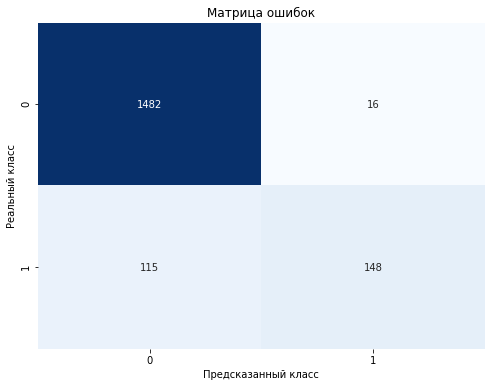

Метрика Precision: 0.9024390243902439
Метрика Recall: 0.5627376425855514
F1-Score: 0.693208430913349
Accuracy: 0.9256104486087451


In [63]:
# Вычисление матрицы ошибок
confusion_mat = confusion_matrix(target_test, test_predictions)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Матрица ошибок")
plt.xlabel("Предсказанный класс")
plt.ylabel("Реальный класс")
plt.show()

# Вычисление основных метрик из матрицы ошибок
tn, fp, fn, tp = confusion_mat.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print("Метрика Precision:", precision)
print("Метрика Recall:", recall)
print("F1-Score:", f1_score)
print("Accuracy:", accuracy)

- Precision (Точность): 0.90

Precision измеряет, насколько модель точно идентифицирует ушедших клиентов. В данном случае, значение Precision равно 0.90, что означает, что 90% клиентов, которых модель классифицировала как ушедших, действительно ушли. Это важно для бизнеса, так как ошибка в определении уходящих клиентов может привести к потере дохода.

- Recall (Полнота): 0.56

Recall измеряет, сколько уходящих клиентов модель обнаружила относительно общего числа реальных уходящих клиентов. Значение Recall равно 0.56, что означает, что модель смогла обнаружить 56% всех уходящих клиентов. Это важно, чтобы минимизировать упущенные возможности удержания клиентов.

- F1-Score: 0.69

F1-Score - это сбалансированная метрика, которая учитывает как точность, так и полноту. Значение F1-Score равно 0.69, что показывает, что модель достигла хорошего баланса между точностью и полнотой предсказаний. Это важно для достижения оптимальных результатов в удержании клиентов.

- Accuracy (Точность): 0.93

Accuracy измеряет общую долю правильных предсказаний модели относительно общего числа предсказаний. Значение Accuracy равно 0.93, что означает, что модель правильно предсказала 93% всех случаев. Это высокая точность и может быть полезно в общей оценке производительности модели.

True Positive (TP): 1482 - количество правильно предсказанных положительных случаев (уходящих клиентов).

True Negative (TN): 16 - количество правильно предсказанных отрицательных случаев (неуходящих клиентов).

False Positive (FP): 115 - количество неправильно предсказанных положительных случаев (ложное срабатывание).

False Negative (FN): 148 - количество неправильно предсказанных отрицательных случаев (пропущенный случай).

Итак, модель CatBoost продемонстрировала высокую точность (Accuracy) и хороший баланс между точностью и полнотой (F1-Score), что делает ее хорошим выбором для задачи прогнозирования ухода клиентов. Однако, стоит учесть, что полнота (Recall) ниже, что может означать упущенные возможности в удержании некоторых клиентов.

### Вывод
Целью работы было пстроить модель для предсказания оттока клиентов, что бы заказчик имел возможность удержать клиента с помощью промокодов и других предложений. 

- Привели названия столбцов к "змеиному" типу
- Создали целевой признак столбец `status`, который указывает на то, ушел клиент или остался. Проанализируйте его распределение, чтобы понять, какой процент клиентов ушел и какой остался.
- Избавились от пропусков, заменив их `Not_used`
- Столбцы `begin_date` и `end_date` преобразовали в тип данных `atetime`
- Столбец `total_charges` преобразовали в тип данных `float`
- Создали признак contract_days- длительность контракта в днях
- Построили тепловую карту и на ее основание из-за высокой корреляции (порог 0.8 взяли) мы удалили некоторых признаки (`internet_service`, `online_security`, `online_backup`, `device_protection` и `tech_support`,`streaming_tv`,`streaming_movies`,`total_charges` ) для упрощения модели и уменьшения мультиколлинеарности.
- Была проведена визуализация дисбаланса классов, подтверждающая присутствие дисбаланса между активными и ушедшими клиентами.
- Проведена предобработка данных, включая заполнение пропущенных значений, преобразование категориальных признаков в числовые с помощью OrdinalEncoder, а также стандартизация числовых признаков с использованием StandardScaler
- Построены и обучены три модели: DecisionTreeClassifier, RandomForestClassifier и CatBoostClassifier. Для каждой модели выполнен подбор гиперпараметров через GridSearchCV с использованием метрики roc_au.
- Выбрана лучшая модель на основе метрики roc_auc с наилучшими подобранными гиперпараметрами
  -Лучшая модель: CatBoostClassifier
Параметры:

  - 'iterations': 200
  - 'learning_rate': 0.2
  - 'max_depth': 5
  - Лучший ROC-AUC: 0.91
- Проведена оценка лучшей модели на тестовой выборке. Рассчитаны значения метрик roc_auc и accuracy на тестовых данных.
 - ROC-AUC на тестовой выборке: 0.93
 - Accuracy на тестовой выборке: 0.93
- Анализ важности признаков показал, что на уход клиента влиет длительность контракта и ежемесячные платежи
- Модель достигает хорошей точности в определении положительных случаев, но при этом имеет ограниченную способность выявления всех положительных случаев,поскольку в данных присутствует дисбаланс классов


### Отчет

1. Ключевые шаги работы над проектом:
- Загрузка и ознакомление с данными 
- Подготовка данных
- Исследовательский анализ данных
- Обучение моделей 
- Тестирование модели 
- Анализ и интерпретация важности признаков
- Анализ и интерпретация матрицы ошибок

2. Анализ соответствия фактической работы запланированным шагам

- Загрузка и ознакомление с данными: Данный этап был успешно выполнен. Нам удалось получить исходные данные и ознакомиться с их структурой.

- Подготовка данных: Были проведены работы по подготовке данных, включая обработку пропущенных значений, кодирование категориальных признаков, масштабирование числовых признаков и формирование окончательного списка признаков.

- Исследовательский анализ данных (EDA): Этап EDA был проведен для изучения основных характеристик данных, выявления корреляций и визуализации ключевых зависимостей.

- Обучение моделей: На этом этапе мы обучили несколько моделей, включая Decision Tree, Random Forest и CatBoost, используя кросс-валидацию для оценки их производительности.

- Тестирование модели: Модели были протестированы на тестовой выборке.  В ходе тестирования, мы измерили ключевые метрики, включая ROC-AUC и Accuracy

- Анализ и интерпретация важности признаков: Мы провели анализ важности признаков для лучшей модели (CatBoost) и интерпретировали результаты.

- Анализ и интерпретация матрицы ошибок: Была построена и проанализирована матрица ошибок для оценки производительности модели

Все этапы выполнены в соответствии с запланированными шагами проекта.

3. Рефлексия над сложностями и описание путей их решения.

Использование phik: При использовании библиотеки phik для расчета корреляции между переменными, возникли некоторые трудности в интерпретации результатов. Эта библиотека предоставляет информацию о нелинейных зависимостях между переменными, что может быть сложно интерпретировать сразу. Решение этой сложности потребовало более глубокого анализа результатов и выделения основных закономерностей.

4. Краткое описание предобработки данных .
- Все названия столбцов были преобразованы в формат "змеиного" типа, то есть слова разделяются нижним подчеркиванием вместо пробелов или других разделителей.
- Таблицы были объединены в одну общую таблицу
- Был выделен целевой признак `status`, который указывает на статус клиента (активный/ушедший).
- В столбцах `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines` пропущенные значения были заполнены строкой `Not_used`. Это позволило избавиться от пропусков и обеспечить корректную обработку данных.
- Столбцы `begin_date` и `end_date` были преобразованы в тип данных `datetime` для дальнейшего анализа дат. Также столбец `total_charges` был преобразован в тип данных `float` для работы с числовыми значениями.

5. Итоговый список признаков.

Целевой признак - `status`, который указывает на статус клиента активный/ушедший

- `contract_days` - длительность контракта
- `monthly_charges` - ежемесячные траты  
- `type` - тип оплаты
- `payment_method `- способ оплаты 
- `multiple_lines` - наличие нескольких линий связи
- `partner` - наличие партнера
- `paperless_billing` - безбумажное выставление счета 
- `dependents` - наличие иждивенцев 
- `senior_citizen` - наличие пенсионного статуса

Преобразование категориальных признаков в числовые с помощью OrdinalEncoder.
Стандартизация числовых признаков с использованием StandardScaler.

6. Сводная таблица исследованных моделей и их метрика на кросс-валидации.
|    Model     | ROC-AUC Score |
|--------------|--------------|
| Decision Tree|     0.78     |
| Random Forest|     0.83     |
|   CatBoost   |     0.91     |


7. Лучшая модель - название, гиперпараметры, метрика на кросс-валидации.
- Лучшая модель: CatBoostClassifier 

 Параметры 
  - 'iterations': 200 
  - 'learning_rate': 0.2
  - 'max_depth': 5

- Лучший ROC-AUC: 0.91

8. Итоговая метрика на test (AUC-ROC и Accuracy).
- ROC-AUC на тестовой выборке: 0.93
- Accuracy на тестовой выборке: 0.93
9. Матрица ошибок . 

- Precision (Точность): 0.90

Precision измеряет, насколько модель точно идентифицирует ушедших клиентов. В данном случае, значение Precision равно 0.90, что означает, что 90% клиентов, которых модель классифицировала как ушедших, действительно ушли. Это важно для бизнеса, так как ошибка в определении уходящих клиентов может привести к потере дохода.

- Recall (Полнота): 0.56

Recall измеряет, сколько уходящих клиентов модель обнаружила относительно общего числа реальных уходящих клиентов. Значение Recall равно 0.56, что означает, что модель смогла обнаружить 56% всех уходящих клиентов. Это важно, чтобы минимизировать упущенные возможности удержания клиентов.

- F1-Score: 0.69

F1-Score - это сбалансированная метрика, которая учитывает как точность, так и полноту. Значение F1-Score равно 0.69, что показывает, что модель достигла хорошего баланса между точностью и полнотой предсказаний. Это важно для достижения оптимальных результатов в удержании клиентов.

- Accuracy (Точность): 0.93

Accuracy измеряет общую долю правильных предсказаний модели относительно общего числа предсказаний. Значение Accuracy равно 0.93, что означает, что модель правильно предсказала 93% всех случаев. Это высокая точность и может быть полезно в общей оценке производительности модели.

True Positive (TP): 1482 - количество правильно предсказанных положительных случаев (уходящих клиентов).

True Negative (TN): 16 - количество правильно предсказанных отрицательных случаев (неуходящих клиентов).

False Positive (FP): 115 - количество неправильно предсказанных положительных случаев (ложное срабатывание).

False Negative (FN): 148 - количество неправильно предсказанных отрицательных случаев (пропущенный случай).

Итак, модель CatBoost продемонстрировала высокую точность (Accuracy) и хороший баланс между точностью и полнотой (F1-Score), что делает ее хорошим выбором для задачи прогнозирования ухода клиентов. Однако, стоит учесть, что полнота (Recall) ниже, что может означать упущенные возможности в удержании некоторых клиентов.

10. Важность признаков

|     Признак        |   Важность   |
|---------------------|--------------|
|   contract_days     |   61.97  |
|   monthly_charges  |   12.55  |
|   type              |   8.69   |
|   payment_method    |   4.25  |
|   multiple_lines    |   4.17  |
|   partner           |   3.65   |
|   paperless_billing |   1.94   |
|   dependents        |   1.59   |
|   senior_citizen    |   1.19   |

`contract_days` (Длительность контракта) - этот признак является наиболее важным для модели. Это означает, что длительность контракта сильно влияет на прогнозы модели.

`monthly_charges` (Ежемесячные платежи) - этот признак следующий по важности после длительности контракта. Ежемесячные платежи также оказывают существенное воздействие на прогнозы модели.

Остальные признаки имеют гораздо более низкую важность, что  означает, что эти признаки практически не оказывают существенного влияния на прогнозы модели. Важность признаков - это полезный инструмент для определения, какие из них стоит учитывать при анализе данных и построении модели, а какие можно игнорировать. 
